In [1]:
#from ipynb.fs.full.fun_tools_v import *

#f=BankAccount()
import sys
import pandas as pd
import numpy as np
import scorecard
import matplotlib.pyplot as plt
import os
import sys
import warnings
import scipy.stats as stats
import seaborn as sns
import sklearn
import logging 
sys.path.insert(0,r'C:\Users\rahul')
#import fun_tool
#from fun_tool import *
from scorecard_pk import *
import ml_fun_tools
from ml_fun_tools import *
import logging

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
##from split_sample import sample
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support,
                            ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')



In [2]:
import logging

log_format = "%(asctime)s::%(levelname)s::%(name)s::"\
             "%(filename)s::%(lineno)d::%(message)s"
logging.basicConfig(filename=r'C:\mystuff\git hub repo\rd\cc_default_log.log',
                    filemode='w', level='DEBUG',
                    format=log_format)


In [3]:
#logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
 

In [5]:
df_cd_default=pd.read_csv(r'C:\mystuff\git hub repo\iNeuron\ML project\cc_default_prediction\notebooks\data\UCI_Credit_Card.csv')
logging.info("Data Successfully Impoerted")

print('''LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
target.payment.next.month: Default payment (1=yes, 0=no)''')

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AM

In [6]:
df_cd_default[['BILL_AMT2','PAY_AMT2']].corr()

,BILL_AMT2,PAY_AMT2
BILL_AMT2,1.000000,0.100851
PAY_AMT2,0.100851,1.000000


## Conclution: 
we have successfully imported the data. This is the entire polulation     

## Let’s check the character of the Data set. 
1.	we are going to draw statistical inferences.
2.	Type of the independent data set
3.	Missing Values in the data set
4.	Multivariate and Bivariate analysis



In [6]:
overview_data_classification(df_cd_default,'target')

Time Taken: 00:04:49


,Name,dtypes,Missing,%Missing,Uniques,%Unique,Entropy,IV,tier
0,ID,int64,0,0.00%,30000,100.00%,14.87,0.00,not_useful
1,LIMIT_BAL,float64,0,0.00%,81,0.27%,5.14,2.39,weak
2,SEX,int64,0,0.00%,2,0.01%,0.97,0.03,not_useful
3,EDUCATION,int64,0,0.00%,7,0.02%,1.59,0.45,not_useful
4,MARRIAGE,int64,0,0.00%,4,0.01%,1.09,0.29,not_useful
5,AGE,int64,0,0.00%,56,0.19%,5.09,1.37,not_useful
6,PAY_0,int64,0,0.00%,11,0.04%,2.07,1.10,not_useful
7,PAY_2,int64,0,0.00%,11,0.04%,1.84,1.14,not_useful
8,PAY_3,int64,0,0.00%,11,0.04%,1.83,1.47,not_useful
9,PAY_4,int64,0,0.00%,11,0.04%,1.77,1.45,not_useful


## Conclution
•	This dataset has 22 independent variable 
•	ID column is not any impact on the prediction it is a unique key 
•	This Dataset have no missing values 
•	This Dataset has some categoric variable which marked as int type need to convert into string like SEX ,MERRAGE
•	Numeric continuous variables have suspicious outcome with respect to information value. All these variables need to delt with 


In [7]:
target_group = df_cd_default.groupby('target').size().reset_index()
target_group.columns = ['target','total']
target_group['%'] = round(target_group['total']*100/sum(target_group['total']),2)
target_group.sort_values(by='total', ascending=False)

,target,total,%
0,0,23364,77.88
1,1,6636,22.12


#77% of customer falls under non default category and 22% customer falls under default category


2: Female, 1: Male


2    0.603733
1    0.396267
Name: SEX, dtype: float64

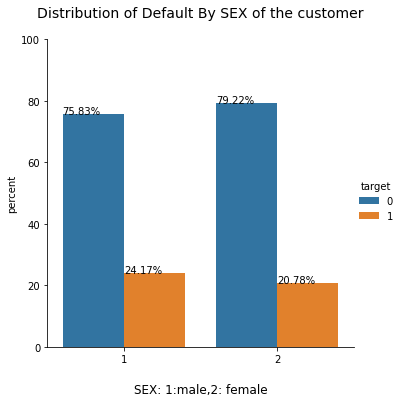

In [8]:
x='SEX'
y="target"

df1 = df_cd_default.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    plt.title('Distribution of Default By SEX of the customer\n', fontsize=14)
    plt.xlabel('\nSEX: 1:male,2: female', fontsize=12);

print('''2: Female, 1: Male''')
df_cd_default['SEX'].value_counts(normalize=True)


Conclution:
Overall 60% customer are Female and 40% are male category and out of 60% female 24% defaulted and out of 40% male 20% defaulted. Similar distribution found under this category


(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

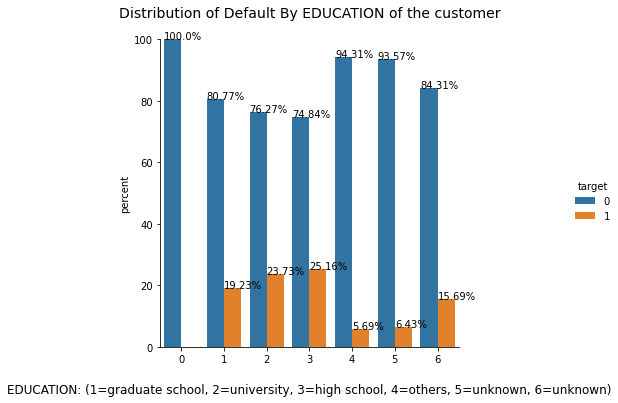

In [9]:
x='EDUCATION'
y="target"

df1 = df_cd_default.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    plt.title('Distribution of Default By EDUCATION of the customer\n', fontsize=14)
    plt.xlabel('\nEDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)', fontsize=12);

print('''(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)''')
df_cd_default['EDUCATION'].value_counts(normalize=True)


Majority of customer are graduated or above. There are other educational qualification but distribution is very minimal. All category more than 3 will be merged as these has very minimal contribution on the dataset.  

MARRIAGE: Marital status (1=married, 2=single, 3=others


2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

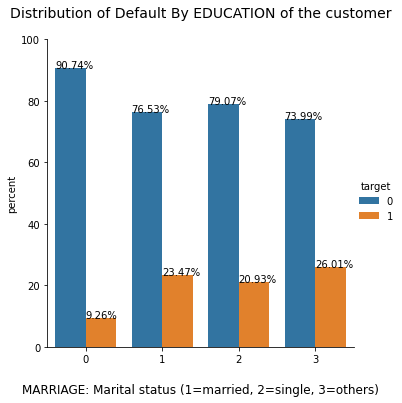

In [10]:
x='MARRIAGE'
y="target"

df1 = df_cd_default.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    plt.title('Distribution of Default By EDUCATION of the customer\n', fontsize=14)
    plt.xlabel('\nMARRIAGE: Marital status (1=married, 2=single, 3=others)', fontsize=12);

print('''MARRIAGE: Marital status (1=married, 2=single, 3=others''')
df_cd_default[x].value_counts(normalize=True)


52% unmarried customer and 45% married customer are using the credit card. Bad distribution is equal across this category. As 20% of bad customer lies under this two category so data cannot explain which segment most vulnerable for default 

median point of Bad class is 34.0
median point of Good class is 34.0


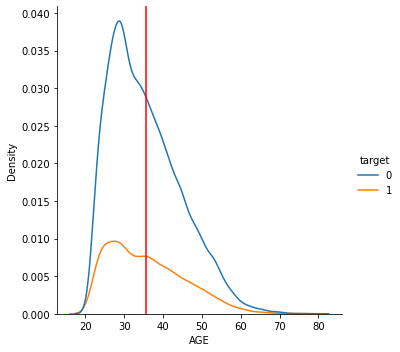

<Figure size 576x1224 with 0 Axes>

In [11]:

df=df_cd_default
x='AGE'
sns.displot(data=df, x=x,
            hue='target', kind='kde')
plt.axvline(x=df[x].mean(),
            color='red')
plt.figure(figsize=(8,17))
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

print(f'median point of Bad class is {df_cd_default[df_cd_default.target==1].AGE.median()}')

print(f'median point of Good class is {df_cd_default[df_cd_default.target==0].AGE.median()}')


Distribution plotted with respect to target class. Both Good and Bad class has right skewed and med point found at 34. This describes maximum credit card issued for lower aged people. Bad distribution for age slightly flatterer with respect to good class  

median point of Bad class is 20185.0
median point of Good class is 23119.5


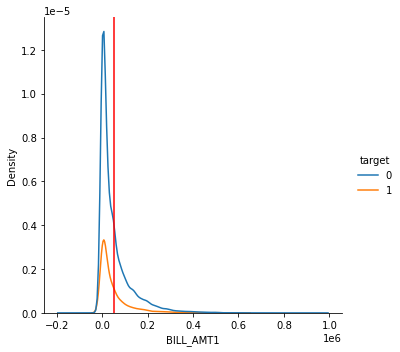

<Figure size 576x1224 with 0 Axes>

In [12]:

df=df_cd_default
x='BILL_AMT1'
sns.displot(data=df, x=x,
            hue='target', kind='kde')
plt.axvline(x=df[x].mean(),
            color='red')
plt.figure(figsize=(8,17))
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

print(f'median point of Bad class is {df_cd_default[df_cd_default.target==1].BILL_AMT1.median()}')

print(f'median point of Good class is {df_cd_default[df_cd_default.target==0].BILL_AMT1.median()}')


coreletion plot  between Bill Amount and Pay amount for all 6 months for bad class


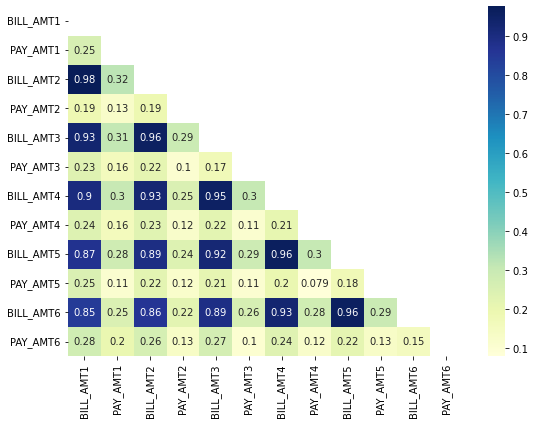

coreletion plot  between Bill Amount and Pay amount for all 6 months for good class


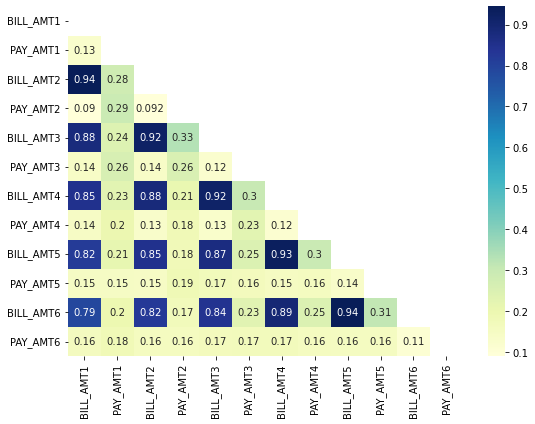

<Figure size 432x288 with 0 Axes>

In [13]:
# creating mask
#plt.subplot(1, 2, 1) # row 1, col 2 index 1
print('coreletion plot  between Bill Amount and Pay amount for all 6 months for bad class')
plt.figure(figsize=(8,6))
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

mask = np.triu(np.ones_like(df_cd_default[df_cd_default.target==1][['BILL_AMT1','PAY_AMT1','BILL_AMT2','PAY_AMT2','BILL_AMT3'
                                           ,'PAY_AMT3','BILL_AMT4','PAY_AMT4',
                                          'BILL_AMT5','PAY_AMT5','BILL_AMT6','PAY_AMT6']].corr()))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df_cd_default[df_cd_default.target==1][['BILL_AMT1','PAY_AMT1','BILL_AMT2','PAY_AMT2',
                                      'BILL_AMT3','PAY_AMT3','BILL_AMT4','PAY_AMT4',
                                     'BILL_AMT5','PAY_AMT5','BILL_AMT6','PAY_AMT6']].corr(),
                       cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

print('coreletion plot  between Bill Amount and Pay amount for all 6 months for good class')
#plt.subplot(1, 2, 2) # index 2
plt.figure(figsize=(8,6))
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

mask = np.triu(np.ones_like(df_cd_default[df_cd_default.target==0][['BILL_AMT1','PAY_AMT1','BILL_AMT2','PAY_AMT2','BILL_AMT3'
                                           ,'PAY_AMT3','BILL_AMT4','PAY_AMT4',
                                          'BILL_AMT5','PAY_AMT5','BILL_AMT6','PAY_AMT6']].corr()))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df_cd_default[df_cd_default.target==0][['BILL_AMT1','PAY_AMT1','BILL_AMT2','PAY_AMT2',
                                      'BILL_AMT3','PAY_AMT3','BILL_AMT4','PAY_AMT4',
                                     'BILL_AMT5','PAY_AMT5','BILL_AMT6','PAY_AMT6']].corr(),
                       cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()
plt.tight_layout()

BILL_AMT and PAY_AMT are the bill amount and pay amount for the individual customer. Both independent variables are given for 6 consecutive months. The corelation checked with each other for both Bad and Good class. BILL_AMT has high correlated with each other as the nature of the variable explains that the BILL_AMT has an cumulative effect on each other for all across 6 months. This can lead to multicorrelation effect and can be a cause of  mis judgement. Few variables needed to be dropped base on the predictive nature 

In [14]:
df_cd_filtered=var_filter(df_cd_default,'target')

[INFO] filtering variables ...
Variable filtering on 30000 rows and 25 columns in 00:03:49 
3 variables are removed


In [18]:
df_cd_filtered['PAY_0'] = df_cd_filtered['PAY_0'].astype(str)
df_cd_filtered['PAY_2'] = df_cd_filtered['PAY_2'].astype(str)
df_cd_filtered['PAY_3'] = df_cd_filtered['PAY_3'].astype(str)
df_cd_filtered['PAY_4'] = df_cd_filtered['PAY_4'].astype(str)
df_cd_filtered['PAY_5'] = df_cd_filtered['PAY_5'].astype(str)
df_cd_filtered['PAY_6'] = df_cd_filtered['PAY_6'].astype(str)


In [19]:
df_cd_filtered.PAY_6.dtypes

dtype('O')

## Varibale selection and feature engineering

For variable selection and feature selection I am considering Weight Of Evidence and Information value for primary criteria for choosing the independent variable: 

WOE and IV defination: 
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:25


{'BILL_AMT2': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT4': <Figure size 432x288 with 2 Axes>,
 'PAY_2': <Figure size 432x288 with 2 Axes>,
 'PAY_0': <Figure size 432x288 with 2 Axes>,
 'PAY_5': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT1': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT4': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT6': <Figure size 432x288 with 2 Axes>,
 'PAY_6': <Figure size 432x288 with 2 Axes>,
 'PAY_3': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT3': <Figure size 432x288 with 2 Axes>,
 'LIMIT_BAL': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT2': <Figure size 432x288 with 2 Axes>,
 'EDUCATION': <Figure size 432x288 with 2 Axes>,
 'PAY_4': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT1': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT5': <Figure size 432x288 with 2 Axes>,
 'BILL_AMT6': <Figure size 432x288 with 2 Axes>,
 'AGE': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT3': <Figure size 432x288 with 2 Axes>,
 'PAY_AMT5': <Figure size 432x288 with 2 Axes>}

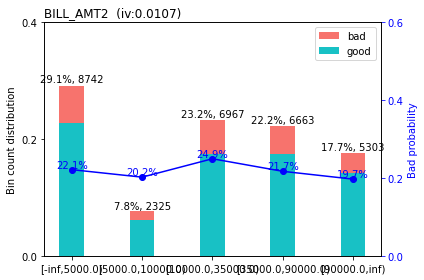

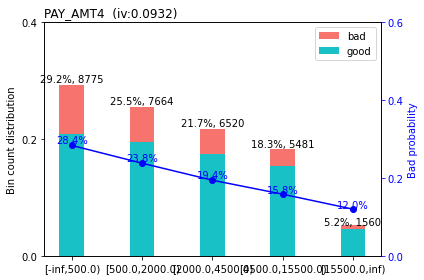

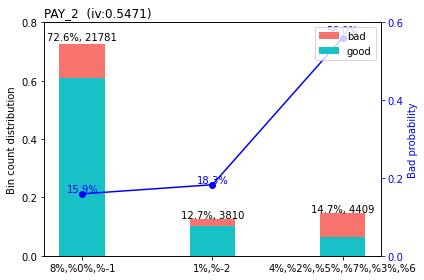

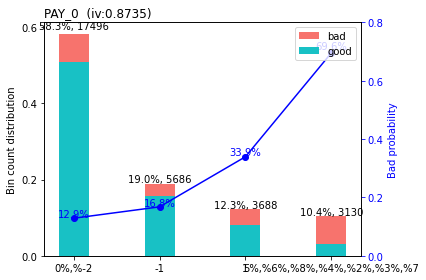

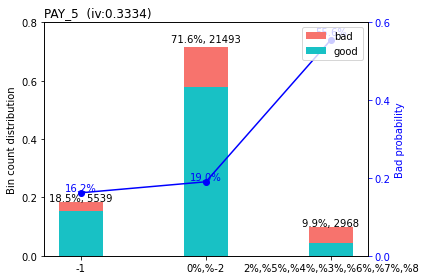

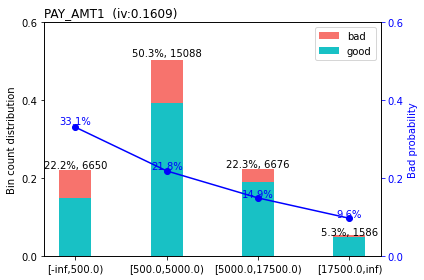

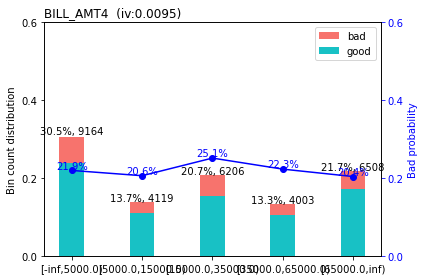

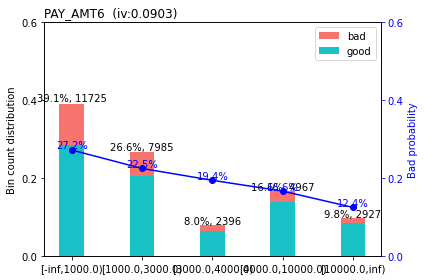

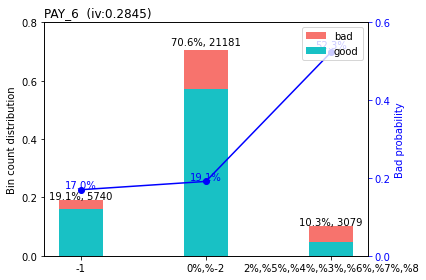

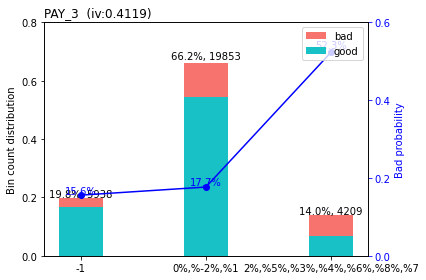

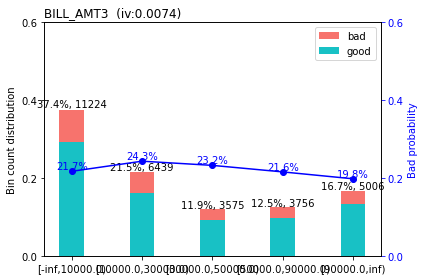

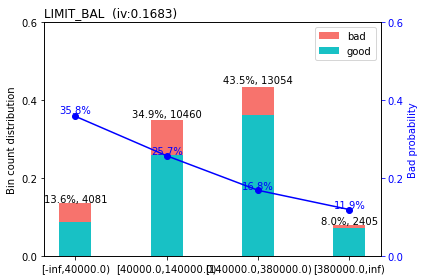

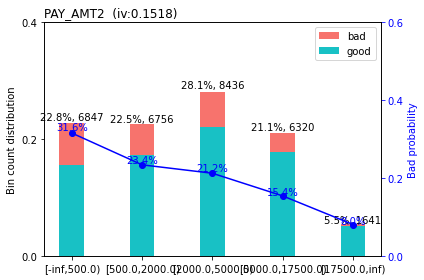

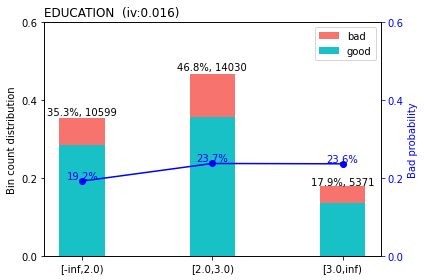

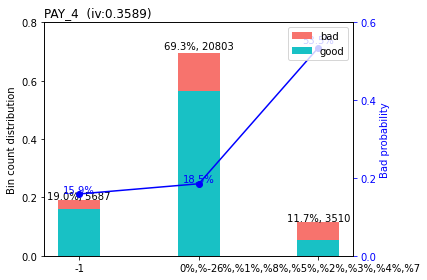

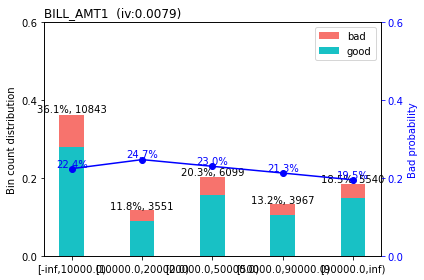

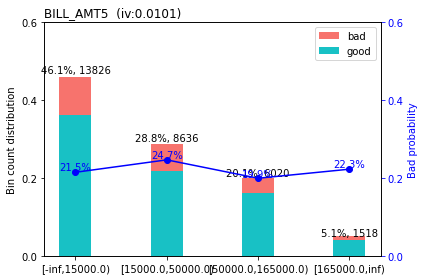

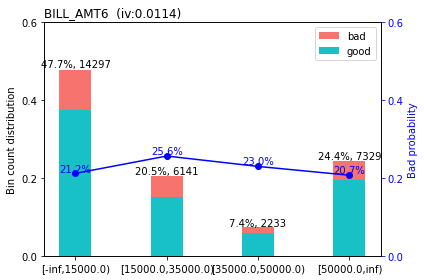

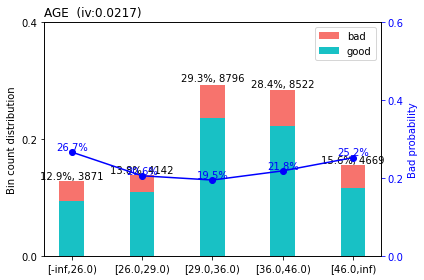

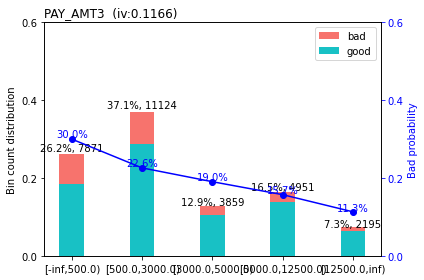

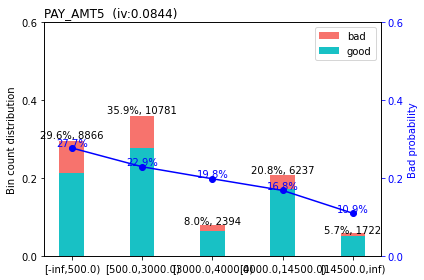

In [20]:
bins =woebin(df_cd_filtered, y="target")
woebin_plot(bins)

# check every independent varibales 

## AGE:

In [21]:
bins['AGE']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AGE,"[-inf,26.0)",3871,0.129033,2839,1032,0.266598,0.246734,0.008390,0.021694,26.0,False
1,AGE,"[26.0,29.0)",4142,0.138067,3290,852,0.205698,-0.092369,0.001148,0.021694,29.0,False
2,AGE,"[29.0,36.0)",8796,0.293200,7083,1713,0.194748,-0.160764,0.007238,0.021694,36.0,False
3,AGE,"[36.0,46.0)",8522,0.284067,6661,1861,0.218376,-0.016469,0.000077,0.021694,46.0,False
4,AGE,"[46.0,inf)",4669,0.155633,3491,1178,0.252302,0.172317,0.004842,0.021694,inf,False


AGE:  This independent variable has very less predictive power. Age group between 29 to 46 have more mass as most of the customer falls under this bucket(We saw before this is right skewed distribution). We can split this group further to get a uniformity and gather more WOE and IV from the bins 

## Binnng Adjustments 

In [22]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:23


In [23]:
bins_adj['AGE']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AGE,"[-inf,25.0)",2685,0.0895,1955,730,0.271881,0.273586,0.007204,0.017173,25.0,False
1,AGE,"[25.0,30.0)",6933,0.2311,5466,1467,0.211597,-0.056641,0.000730,0.017173,30.0,False
2,AGE,"[30.0,35.0)",6078,0.2026,4904,1174,0.193156,-0.170947,0.005638,0.017173,35.0,False
3,AGE,"[35.0,40.0)",5160,0.1720,4058,1102,0.213566,-0.044877,0.000342,0.017173,40.0,False
4,AGE,"[40.0,45.0)",3858,0.1286,2989,869,0.225246,0.023336,0.000070,0.017173,45.0,False
5,AGE,"[45.0,inf)",5286,0.1762,3992,1294,0.244798,0.132133,0.003189,0.017173,inf,False


## BILL_AMT1

In [24]:
bins['BILL_AMT1']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT1,"[-inf,10000.0)",10843,0.361433,8414,2429,0.224015,0.016270,0.000096,0.007912,10000.0,False
1,BILL_AMT1,"[10000.0,20000.0)",3551,0.118367,2673,878,0.247254,0.145377,0.002603,0.007912,20000.0,False
2,BILL_AMT1,"[20000.0,50000.0)",6099,0.203300,4696,1403,0.230038,0.050589,0.000528,0.007912,50000.0,False
3,BILL_AMT1,"[50000.0,90000.0)",3967,0.132233,3123,844,0.212755,-0.049710,0.000322,0.007912,90000.0,False
4,BILL_AMT1,"[90000.0,inf)",5540,0.184667,4458,1082,0.195307,-0.157202,0.004363,0.007912,inf,False



BILL_AMT1  is not well distributed and need further split of the bins 


In [25]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000]
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:23


In [26]:
bins_adj['BILL_AMT1']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT1,"[-inf,100.0)",2656,0.088533,1998,658,0.247741,0.147990,2.018574e-03,0.013695,100.0,False
1,BILL_AMT1,"[100.0,500.0)",1231,0.041033,935,296,0.240455,0.108500,4.976188e-04,0.013695,500.0,False
2,BILL_AMT1,"[500.0,1000.0)",939,0.031300,731,208,0.221512,0.001812,1.027779e-07,0.013695,1000.0,False
3,BILL_AMT1,"[1000.0,3000.0)",2249,0.074967,1750,499,0.221876,0.003922,1.154424e-06,0.013695,3000.0,False
4,BILL_AMT1,"[3000.0,5000.0)",1328,0.044267,1093,235,0.176958,-0.278409,3.165085e-03,0.013695,5000.0,False
5,BILL_AMT1,"[5000.0,10000.0)",2440,0.081333,1907,533,0.218443,-0.016078,2.093102e-05,0.013695,10000.0,False
6,BILL_AMT1,"[10000.0,20000.0)",3551,0.118367,2673,878,0.247254,0.145377,2.602514e-03,0.013695,20000.0,False
7,BILL_AMT1,"[20000.0,30000.0)",2484,0.082800,1899,585,0.235507,0.081216,5.584929e-04,0.013695,30000.0,False
8,BILL_AMT1,"[30000.0,40000.0)",1527,0.050900,1177,350,0.229208,0.045896,1.085886e-04,0.013695,40000.0,False
9,BILL_AMT1,"[40000.0,50000.0)",2088,0.069600,1620,468,0.224138,0.016974,2.014748e-05,0.013695,50000.0,False


## BILL_AMT2

In [27]:
bins['BILL_AMT2']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT2,"[-inf,5000.0)",8742,0.291400,6806,1936,0.221460,0.001506,6.615491e-07,0.01071,5000.0,False
1,BILL_AMT2,"[5000.0,10000.0)",2325,0.077500,1855,470,0.202151,-0.114220,9.788510e-04,0.01071,10000.0,False
2,BILL_AMT2,"[10000.0,35000.0)",6967,0.232233,5229,1738,0.249462,0.157202,5.989223e-03,0.01071,35000.0,False
3,BILL_AMT2,"[35000.0,90000.0)",6663,0.222100,5216,1447,0.217169,-0.023551,1.223823e-04,0.01071,90000.0,False
4,BILL_AMT2,"[90000.0,inf)",5303,0.176767,4258,1045,0.197058,-0.146096,3.619054e-03,0.01071,inf,False


In [25]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000]
    
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:22


In [26]:
bins_adj['BILL_AMT2']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT2,"[-inf,100.0)",3240,0.108000,2487,753,0.232407,0.063920,4.491105e-04,0.011867,100.0,False
1,BILL_AMT2,"[100.0,500.0)",1264,0.042133,969,295,0.233386,0.069398,2.068350e-04,0.011867,500.0,False
2,BILL_AMT2,"[500.0,1000.0)",871,0.029033,678,193,0.221584,0.002230,1.444573e-07,0.011867,1000.0,False
3,BILL_AMT2,"[1000.0,3000.0)",2140,0.071333,1682,458,0.214019,-0.042183,1.254351e-04,0.011867,3000.0,False
4,BILL_AMT2,"[3000.0,5000.0)",1227,0.040900,990,237,0.193154,-0.170958,1.138339e-03,0.011867,5000.0,False
5,BILL_AMT2,"[5000.0,10000.0)",2325,0.077500,1855,470,0.202151,-0.114220,9.788510e-04,0.011867,10000.0,False
6,BILL_AMT2,"[10000.0,20000.0)",3536,0.117867,2667,869,0.245758,0.137321,2.307317e-03,0.011867,20000.0,False
7,BILL_AMT2,"[20000.0,30000.0)",2562,0.085400,1921,641,0.250195,0.161115,2.315843e-03,0.011867,30000.0,False
8,BILL_AMT2,"[30000.0,40000.0)",1607,0.053567,1241,366,0.227754,0.037648,7.671827e-05,0.011867,40000.0,False
9,BILL_AMT2,"[40000.0,50000.0)",2024,0.067467,1555,469,0.231719,0.060059,2.474261e-04,0.011867,50000.0,False


## BILL_AMT3

In [27]:
bins['BILL_AMT3']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT3,"[-inf,10000.0)",11224,0.374133,8786,2438,0.217213,-0.023295,0.000202,0.007378,10000.0,False
1,BILL_AMT3,"[10000.0,30000.0)",6439,0.214633,4873,1566,0.243205,0.123502,0.003386,0.007378,30000.0,False
2,BILL_AMT3,"[30000.0,50000.0)",3575,0.119167,2744,831,0.232448,0.064145,0.000499,0.007378,50000.0,False
3,BILL_AMT3,"[50000.0,90000.0)",3756,0.125200,2946,810,0.215655,-0.032482,0.000131,0.007378,90000.0,False
4,BILL_AMT3,"[90000.0,inf)",5006,0.166867,4015,991,0.197962,-0.140391,0.003160,0.007378,inf,False


In [28]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000]
    
    
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:20


In [29]:
bins_adj['BILL_AMT3']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT3,"[-inf,100.0)",3585,0.119500,2749,836,0.233194,0.068323,5.684388e-04,0.012037,100.0,False
1,BILL_AMT3,"[100.0,500.0)",1262,0.042067,962,300,0.237718,0.093455,3.769509e-04,0.012037,500.0,False
2,BILL_AMT3,"[500.0,1000.0)",899,0.029967,731,168,0.186874,-0.211762,1.264433e-03,0.012037,1000.0,False
3,BILL_AMT3,"[1000.0,3000.0)",1973,0.065767,1536,437,0.221490,0.001683,1.864340e-07,0.012037,3000.0,False
4,BILL_AMT3,"[3000.0,5000.0)",1189,0.039633,965,224,0.188394,-0.201795,1.523065e-03,0.012037,5000.0,False
5,BILL_AMT3,"[5000.0,10000.0)",2316,0.077200,1843,473,0.204231,-0.101368,7.708154e-04,0.012037,10000.0,False
6,BILL_AMT3,"[10000.0,20000.0)",3729,0.124300,2827,902,0.241888,0.116330,1.736477e-03,0.012037,20000.0,False
7,BILL_AMT3,"[20000.0,30000.0)",2710,0.090333,2046,664,0.245018,0.133327,1.665211e-03,0.012037,30000.0,False
8,BILL_AMT3,"[30000.0,40000.0)",1656,0.055200,1267,389,0.234903,0.077859,3.418736e-04,0.012037,40000.0,False
9,BILL_AMT3,"[40000.0,50000.0)",1919,0.063967,1477,442,0.230328,0.052229,1.770275e-04,0.012037,50000.0,False


## BILL_AMT4

In [30]:
bins['BILL_AMT4']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT4,"[-inf,5000.0)",9164,0.305467,7153,2011,0.219446,-0.010213,0.000032,0.009452,5000.0,False
1,BILL_AMT4,"[5000.0,15000.0)",4119,0.137300,3271,848,0.205875,-0.091283,0.001115,0.009452,15000.0,False
2,BILL_AMT4,"[15000.0,35000.0)",6206,0.206867,4647,1559,0.251209,0.166510,0.006000,0.009452,35000.0,False
3,BILL_AMT4,"[35000.0,65000.0)",4003,0.133433,3111,892,0.222833,0.009454,0.000012,0.009452,65000.0,False
4,BILL_AMT4,"[65000.0,inf)",6508,0.216933,5182,1326,0.203749,-0.104337,0.002293,0.009452,inf,False


In [31]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000]
    
    
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:18


In [32]:
bins_adj['BILL_AMT4']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT4,"[-inf,100.0)",3925,0.130833,3009,916,0.233376,0.069340,6.411954e-04,0.014754,100.0,False
1,BILL_AMT4,"[100.0,500.0)",1157,0.038567,878,279,0.241141,0.112252,5.011183e-04,0.014754,500.0,False
2,BILL_AMT4,"[500.0,1000.0)",947,0.031567,743,204,0.215417,-0.033889,3.591056e-05,0.014754,1000.0,False
3,BILL_AMT4,"[1000.0,3000.0)",2043,0.068100,1610,433,0.211943,-0.054565,1.996678e-04,0.014754,3000.0,False
4,BILL_AMT4,"[3000.0,5000.0)",1092,0.036400,913,179,0.163919,-0.370663,4.486184e-03,0.014754,5000.0,False
5,BILL_AMT4,"[5000.0,10000.0)",2389,0.079633,1917,472,0.197572,-0.142851,1.560233e-03,0.014754,10000.0,False
6,BILL_AMT4,"[10000.0,20000.0)",4049,0.134967,3062,987,0.243764,0.126533,2.236840e-03,0.014754,20000.0,False
7,BILL_AMT4,"[20000.0,30000.0)",2998,0.099933,2276,722,0.240827,0.110537,1.258540e-03,0.014754,30000.0,False
8,BILL_AMT4,"[30000.0,40000.0)",1625,0.054167,1234,391,0.240615,0.109378,6.677262e-04,0.014754,40000.0,False
9,BILL_AMT4,"[40000.0,50000.0)",1732,0.057733,1350,382,0.220554,-0.003752,8.120030e-07,0.014754,50000.0,False


## BILL_AMT5

In [33]:
bins['BILL_AMT5']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT5,"[-inf,15000.0)",13826,0.460867,10858,2968,0.214668,-0.038327,0.000670,0.01007,15000.0,False
1,BILL_AMT5,"[15000.0,50000.0)",8636,0.287867,6506,2130,0.246642,0.142084,0.006041,0.01007,50000.0,False
2,BILL_AMT5,"[50000.0,165000.0)",6020,0.200667,4820,1200,0.199336,-0.131765,0.003356,0.01007,165000.0,False
3,BILL_AMT5,"[165000.0,inf)",1518,0.050600,1180,338,0.222661,0.008463,0.000004,0.01007,inf,False


In [34]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000]
    
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:16


In [35]:
bins_adj['BILL_AMT5']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT5,"[-inf,100.0)",4235,0.141167,3223,1012,0.238961,0.100303,0.001460,0.021444,100.0,False
1,BILL_AMT5,"[100.0,500.0)",1234,0.041133,940,294,0.238250,0.096387,0.000392,0.021444,500.0,False
2,BILL_AMT5,"[500.0,1000.0)",1023,0.034100,813,210,0.205279,-0.094937,0.000299,0.021444,1000.0,False
3,BILL_AMT5,"[1000.0,3000.0)",2113,0.070433,1688,425,0.201136,-0.120524,0.000989,0.021444,3000.0,False
4,BILL_AMT5,"[3000.0,5000.0)",1088,0.036267,932,156,0.143382,-0.528790,0.008663,0.021444,5000.0,False
5,BILL_AMT5,"[5000.0,10000.0)",2403,0.080100,1918,485,0.201831,-0.116202,0.001047,0.021444,10000.0,False
6,BILL_AMT5,"[10000.0,20000.0)",4155,0.138500,3147,1008,0.242599,0.120206,0.002068,0.021444,20000.0,False
7,BILL_AMT5,"[20000.0,30000.0)",3067,0.102233,2321,746,0.243234,0.123659,0.001617,0.021444,30000.0,False
8,BILL_AMT5,"[30000.0,40000.0)",1542,0.051400,1158,384,0.249027,0.154880,0.001286,0.021444,40000.0,False
9,BILL_AMT5,"[40000.0,50000.0)",1602,0.053400,1224,378,0.235955,0.083702,0.000383,0.021444,50000.0,False


## BILL_AMT6

In [36]:
bins['BILL_AMT6']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT6,"[-inf,15000.0)",14297,0.476567,11267,3030,0.211933,-0.054628,0.001401,0.011395,15000.0,False
1,BILL_AMT6,"[15000.0,35000.0)",6141,0.204700,4566,1575,0.256473,0.194305,0.008144,0.011395,35000.0,False
2,BILL_AMT6,"[35000.0,50000.0)",2233,0.074433,1720,513,0.229736,0.048883,0.000180,0.011395,50000.0,False
3,BILL_AMT6,"[50000.0,inf)",7329,0.244300,5811,1518,0.207122,-0.083672,0.001670,0.011395,inf,False


In [37]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000]
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)


[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:15


In [38]:
bins_adj['BILL_AMT6']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,BILL_AMT6,"[-inf,100.0)",4776,0.159200,3672,1104,0.231156,0.056890,0.000523,0.018527,100.0,False
1,BILL_AMT6,"[100.0,500.0)",1274,0.042467,983,291,0.228414,0.041401,0.000074,0.018527,500.0,False
2,BILL_AMT6,"[500.0,1000.0)",1059,0.035300,852,207,0.195467,-0.156181,0.000824,0.018527,1000.0,False
3,BILL_AMT6,"[1000.0,3000.0)",2092,0.069733,1666,426,0.203633,-0.105054,0.000747,0.018527,3000.0,False
4,BILL_AMT6,"[3000.0,5000.0)",1098,0.036600,930,168,0.153005,-0.452534,0.006556,0.018527,5000.0,False
5,BILL_AMT6,"[5000.0,10000.0)",2359,0.078633,1885,474,0.200933,-0.121789,0.001127,0.018527,10000.0,False
6,BILL_AMT6,"[10000.0,20000.0)",3961,0.132033,2988,973,0.245645,0.136712,0.002561,0.018527,20000.0,False
7,BILL_AMT6,"[20000.0,30000.0)",2976,0.099200,2249,727,0.244288,0.129373,0.001720,0.018527,30000.0,False
8,BILL_AMT6,"[30000.0,40000.0)",1514,0.050467,1136,378,0.249670,0.158313,0.001320,0.018527,40000.0,False
9,BILL_AMT6,"[40000.0,50000.0)",1562,0.052067,1192,370,0.236876,0.088802,0.000421,0.018527,50000.0,False


## PAY_0

In [39]:
bins['PAY_0']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_0,"0%,%-2",17496,0.583200,15243,2253,0.128772,-0.653171,0.204379,0.873474,"0%,%-2",False
1,PAY_0,-1,5686,0.189533,4732,954,0.167781,-0.342753,0.020144,0.873474,-1,False
2,PAY_0,1,3688,0.122933,2436,1252,0.339479,0.593072,0.050058,0.873474,1,False
3,PAY_0,"5%,%6%,%8%,%4%,%2%,%3%,%7",3130,0.104333,953,2177,0.695527,2.084775,0.598893,0.873474,"5%,%6%,%8%,%4%,%2%,%3%,%7",False


In [40]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'PAY_0':[-2,-1,0,1,2]
    
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:15


In [41]:
bins_adj['PAY_0']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_0,-2,2759,0.091967,2394,365,0.132294,-0.622137,0.029528,0.873978,-2,False
1,PAY_0,-1,5686,0.189533,4732,954,0.167781,-0.342753,0.020144,0.873978,-1,False
2,PAY_0,0,14737,0.491233,12849,1888,0.128113,-0.659061,0.174941,0.873978,0,False
3,PAY_0,1,3688,0.122933,2436,1252,0.339479,0.593072,0.050058,0.873978,1,False
4,PAY_0,2,2667,0.088900,823,1844,0.691414,2.065423,0.501181,0.873978,2,False
5,PAY_0,missing,463,0.015433,130,333,0.719222,2.199295,0.098125,0.873978,missing,False


In [42]:

bins['PAY_2']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_2,"8%,%0%,%-1",21781,0.726033,18312,3469,0.159267,-0.405003,0.105712,0.547118,"8%,%0%,%-1",False
1,PAY_2,"1%,%-2",3810,0.127000,3114,696,0.182677,-0.239627,0.006805,0.547118,"1%,%-2",False
2,PAY_2,"4%,%2%,%5%,%7%,%3%,%6",4409,0.146967,1938,2471,0.560445,1.501653,0.434601,0.547118,"4%,%2%,%5%,%7%,%3%,%6",False


In [43]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'PAY_0':[-2,-1,0,1,2],
    'PAY_2':[-2,-1,0,1,2]
    
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:14


In [44]:
bins_adj['PAY_2']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_2,-2,3782,0.126067,3091,691,0.182708,-0.239423,0.006744,0.547417,-2,False
1,PAY_2,-1,6050,0.201667,5084,966,0.159669,-0.402003,0.028956,0.547417,-1,False
2,PAY_2,0,15730,0.524333,13227,2503,0.159123,-0.406083,0.076726,0.547417,0,False
3,PAY_2,1,28,0.000933,23,5,0.178571,-0.267369,0.000062,0.547417,1,False
4,PAY_2,2,3927,0.130900,1743,2184,0.556150,1.484237,0.377756,0.547417,2,False
5,PAY_2,missing,483,0.016100,196,287,0.594203,1.640055,0.057172,0.547417,missing,False


In [45]:

bins['PAY_3']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_3,-1,5938,0.197933,5012,926,0.155945,-0.430029,0.032242,0.411877,-1,False
1,PAY_3,"0%,%-2%,%1",19853,0.661767,16344,3509,0.176749,-0.279843,0.047785,0.411877,"0%,%-2%,%1",False
2,PAY_3,"2%,%5%,%3%,%4%,%6%,%8%,%7",4209,0.140300,2008,2201,0.522927,1.350460,0.331850,0.411877,"2%,%5%,%3%,%4%,%6%,%8%,%7",False


In [46]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'PAY_0':[-2,-1,0,1,2],
    'PAY_2':[-2,-1,0,1,2],
    'PAY_3':[-2,-1,0,1,2]
    
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:14


In [47]:
bins_adj['PAY_3']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_3,-2,4085,0.136167,3328,757,0.185312,-0.222077,0.006300,0.414291,-2,False
1,PAY_3,-1,5938,0.197933,5012,926,0.155945,-0.430029,0.032242,0.414291,-1,False
2,PAY_3,0,15764,0.525467,13013,2751,0.174512,-0.295297,0.042054,0.414291,0,False
3,PAY_3,1,4,0.000133,3,1,0.250000,0.160075,0.000004,0.414291,1,False
4,PAY_3,2,3819,0.127300,1850,1969,0.515580,1.321027,0.287367,0.414291,2,False
5,PAY_3,missing,390,0.013000,158,232,0.594872,1.642829,0.046325,0.414291,missing,False


In [48]:

bins['PAY_4']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_4,-1,5687,0.189567,4783,904,0.158959,-0.407307,0.027896,0.358891,-1,False
1,PAY_4,"0%,%-2",20803,0.693433,16950,3853,0.185214,-0.222729,0.032263,0.358891,"0%,%-2",False
2,PAY_4,"6%,%1%,%8%,%5%,%2%,%3%,%4%,%7",3510,0.117000,1631,1879,0.535328,1.400233,0.298732,0.358891,"6%,%1%,%8%,%5%,%2%,%3%,%4%,%7",False


In [49]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'PAY_0':[-2,-1,0,1,2],
    'PAY_2':[-2,-1,0,1,2],
    'PAY_3':[-2,-1,0,1,2],
    
    'PAY_4':[-2,-1,0,1,2],
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:14


In [50]:
bins_adj['PAY_4']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_4,-2,4348,0.144933,3511,837,0.192502,-0.175145,0.004229,0.363327,-2,False
1,PAY_4,-1,5687,0.189567,4783,904,0.158959,-0.407307,0.027896,0.363327,-1,False
2,PAY_4,0,16455,0.548500,13439,3016,0.183288,-0.235542,0.028432,0.363327,0,False
3,PAY_4,1,2,0.000067,1,1,0.500000,1.258687,0.000136,0.363327,1,False
4,PAY_4,2,3159,0.105300,1506,1653,0.523267,1.351822,0.249597,0.363327,2,False
5,PAY_4,missing,349,0.011633,124,225,0.644699,1.854506,0.053036,0.363327,missing,False


In [51]:
bins['PAY_5']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_5,-1,5539,0.184633,4642,897,0.161943,-0.385158,0.024461,0.333404,-1,False
1,PAY_5,"0%,%-2",21493,0.716433,17403,4090,0.190295,-0.189411,0.024345,0.333404,"0%,%-2",False
2,PAY_5,"2%,%5%,%4%,%3%,%6%,%7%,%8",2968,0.098933,1319,1649,0.555593,1.481982,0.284598,0.333404,"2%,%5%,%4%,%3%,%6%,%7%,%8",False


In [52]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'PAY_0':[-2,-1,0,1,2,3,4,5,6,7,8],
    'PAY_2':[-2,-1,0,1,2,3,4,5,6,7,8],
    'PAY_3':[-2,-1,0,1,2,3,4,5,6,7,8],
    
    'PAY_4':[-2,-1,0,1,2,3,4,5,6,7,8],
    'PAY_5':[-2,-1,0,1,2,3,4,5,6,7,8]
    
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:14


In [28]:
bins_adj['PAY_5']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_5,-1,5539,0.184633,4642,897,0.161943,-0.385158,0.024461,0.333404,-1,False
1,PAY_5,"0%,%-2",21493,0.716433,17403,4090,0.190295,-0.189411,0.024345,0.333404,"0%,%-2",False
2,PAY_5,"2%,%5%,%4%,%3%,%6%,%7%,%8",2968,0.098933,1319,1649,0.555593,1.481982,0.284598,0.333404,"2%,%5%,%4%,%3%,%6%,%7%,%8",False


In [29]:
breaks_adj = {
    'AGE': [25, 30, 35,40,45 ],
    'BILL_AMT1':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT2':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT3':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT4':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT5':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'BILL_AMT6':[100,500,1000,3000,5000,10000,20000,30000,40000,50000,70000,100000,200000],
    'PAY_0':[-2,-1,0,1,2],
    'PAY_2':[-2,-1,0,1,2],
    'PAY_3':[-2,-1,0,1,2],
    
    'PAY_4':[-2,-1,0,1,2],
    'PAY_5':[-2,-1,0,1,2],
    'PAY_6':[-2,-1,0,1,2,3,4,5,6,7,8]
}
bins_adj = woebin(df_cd_filtered, y="target", breaks_list=breaks_adj)

[INFO] creating woe binning ...
Binning on 30000 rows and 22 columns in 00:00:14


In [69]:
print(bins_adj)

{'BILL_AMT2':      variable                  bin  count  count_distr  good  bad   badprob  \
0   BILL_AMT2         [-inf,100.0)   3240     0.108000  2487  753  0.232407   
1   BILL_AMT2        [100.0,500.0)   1264     0.042133   969  295  0.233386   
2   BILL_AMT2       [500.0,1000.0)    871     0.029033   678  193  0.221584   
3   BILL_AMT2      [1000.0,3000.0)   2140     0.071333  1682  458  0.214019   
4   BILL_AMT2      [3000.0,5000.0)   1227     0.040900   990  237  0.193154   
5   BILL_AMT2     [5000.0,10000.0)   2325     0.077500  1855  470  0.202151   
6   BILL_AMT2    [10000.0,20000.0)   3536     0.117867  2667  869  0.245758   
7   BILL_AMT2    [20000.0,30000.0)   2562     0.085400  1921  641  0.250195   
8   BILL_AMT2    [30000.0,40000.0)   1607     0.053567  1241  366  0.227754   
9   BILL_AMT2    [40000.0,50000.0)   2024     0.067467  1555  469  0.231719   
10  BILL_AMT2    [50000.0,70000.0)   2298     0.076600  1824  474  0.206266   
11  BILL_AMT2   [70000.0,100000.0)   2

In [95]:
bins_adj['PAY_AMT2']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_AMT2,"[-inf,500.0)",6847,0.228233,4686,2161,0.315613,0.484679,0.060625,0.151849,500.0,False
1,PAY_AMT2,"[500.0,2000.0)",6756,0.225200,5176,1580,0.233866,0.072079,0.001193,0.151849,2000.0,False
2,PAY_AMT2,"[2000.0,5000.0)",8436,0.281200,6646,1790,0.212186,-0.053113,0.000781,0.151849,5000.0,False
3,PAY_AMT2,"[5000.0,17500.0)",6320,0.210667,5347,973,0.153956,-0.445220,0.036611,0.151849,17500.0,False
4,PAY_AMT2,"[17500.0,inf)",1641,0.054700,1509,132,0.080439,-1.177714,0.052638,0.151849,inf,False


In [81]:
bins['PAY_2']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PAY_2,"8%,%0%,%-1",21781,0.726033,18312,3469,0.159267,-0.405003,0.105712,0.547118,"8%,%0%,%-1",False
1,PAY_2,"1%,%-2",3810,0.127000,3114,696,0.182677,-0.239627,0.006805,0.547118,"1%,%-2",False
2,PAY_2,"4%,%2%,%5%,%7%,%3%,%6",4409,0.146967,1938,2471,0.560445,1.501653,0.434601,0.547118,"4%,%2%,%5%,%7%,%3%,%6",False


In [33]:
df_cd_woe = woebin_ply(df_cd_filtered, bins)

[INFO] converting into woe values ...


In [32]:
df_cd_woe_adj = woebin_ply(df_cd_filtered, bins_adj)

[INFO] converting into woe values ...


In [39]:
df_cd_woe_adj

,target,PAY_AMT4_woe,PAY_AMT1_woe,BILL_AMT4_woe,PAY_4_woe,BILL_AMT1_woe,BILL_AMT5_woe,BILL_AMT6_woe,AGE_woe,PAY_AMT5_woe,...,PAY_5_woe,PAY_AMT6_woe,PAY_6_woe,PAY_3_woe,BILL_AMT3_woe,LIMIT_BAL_woe,PAY_AMT2_woe,EDUCATION_woe,PAY_2_woe,PAY_AMT3_woe
0,1,0.332804,0.552881,0.069340,-0.407307,-0.278409,0.100303,0.056890,0.273586,0.300488,...,-0.147246,0.273671,-0.125017,-0.430029,-0.211762,0.676765,0.072079,0.091416,1.484237,0.411208
1,1,0.094988,0.552881,-0.370663,-0.235542,0.003922,-0.528790,-0.452534,-0.056641,0.300488,...,-0.200910,0.019319,1.284757,-0.295297,0.001683,0.197458,0.072079,0.091416,1.484237,0.027638
2,0,0.094988,-0.017578,0.126533,-0.235542,0.081216,0.120206,0.136712,-0.170947,0.044275,...,-0.200910,-0.353411,-0.201427,-0.295297,0.116330,0.197458,0.072079,0.091416,-0.406083,0.027638
3,0,0.094988,-0.017578,0.110537,-0.235542,0.016974,0.123659,0.129373,-0.044877,0.044275,...,-0.200910,0.019319,-0.201427,-0.295297,0.052229,0.197458,-0.053113,0.091416,-0.406083,0.027638
4,0,-0.411755,-0.017578,0.110537,-0.235542,-0.016078,0.120206,0.136712,0.132133,0.044275,...,-0.200910,0.273671,-0.201427,-0.430029,0.077859,0.197458,-1.177714,0.091416,-0.406083,-0.420977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,-0.163460,-0.485817,-0.016285,-0.235542,-0.180133,0.154880,0.136712,-0.044877,-0.340970,...,-0.200910,0.019319,-0.201427,-0.295297,-0.060298,-0.338483,-1.177714,0.086473,-0.406083,-0.420977
29996,0,0.332804,-0.017578,-0.142851,-0.407307,0.003922,-0.116202,0.056890,0.023336,0.300488,...,-0.200910,0.273671,-0.201427,-0.430029,-0.201795,-0.338483,-0.053113,0.086473,-0.402003,-0.420977
29997,1,-0.163460,0.552881,0.110537,-0.407307,-0.278409,0.123659,0.136712,-0.044877,0.044275,...,-0.200910,-0.165069,-0.201427,1.321027,0.001683,0.676765,0.484679,0.091416,NaN,-0.801929
29998,1,0.094988,-0.978401,-0.039523,-0.235542,0.147990,0.120206,0.088802,0.023336,-0.840505,...,-0.200910,0.019319,-0.327890,-0.295297,-0.058614,0.197458,-0.053113,0.086473,-0.402003,0.027638


In [40]:
## Split data for woe initial bin ##

x_train_woe, x_test_woe, y_train_woe, y_test_woe =split_data(df_cd_woe,'target',0.3)

shape of training set X: (21000, 21)
shape of training set y: (21000, 1)
ratio of label class of trainning: target
0         0.779238
1         0.220762
dtype: float64
shape of testing set  x: (9000, 21)
shape of testing set  y: (9000, 1)
ratio of label class of test: target
0         0.777778
1         0.222222
dtype: float64


In [41]:
## Split data for woe  bin adj ##

x_train_woeadj, x_test_woeadj, y_train_woeadj, y_test_woeadj =split_data(df_cd_woe_adj,'target',0.3)

shape of training set X: (21000, 21)
shape of training set y: (21000, 1)
ratio of label class of trainning: target
0         0.779238
1         0.220762
dtype: float64
shape of testing set  x: (9000, 21)
shape of testing set  y: (9000, 1)
ratio of label class of test: target
0         0.777778
1         0.222222
dtype: float64


In [42]:
# Split the data without WOE

x_train, x_test, y_train, y_test=split_data(df_cd_filtered,'target',0.3)


shape of training set X: (21000, 21)
shape of training set y: (21000, 1)
ratio of label class of trainning: target
0         0.779238
1         0.220762
dtype: float64
shape of testing set  x: (9000, 21)
shape of testing set  y: (9000, 1)
ratio of label class of test: target
0         0.777778
1         0.222222
dtype: float64


In [43]:
print(
'''
S1: I have applied the woe created from the initial bins 
S2: This sample is created with the adjusted woe 
S3: This sample is created from the original dataset I,e data without imputing woe values 

All S1,S2 and S3 are splitted in to test and train  
'''
)


S1: I have applied the woe created from the initial bins 
S2: This sample is created with the adjusted woe 
S3: This sample is created from the original dataset I,e data without imputing woe values 

All S1,S2 and S3 are splitted in to test and train  



In [44]:
classifiers=['Logistic Regression',
             'KNN',
             'Decision Tree', 
             'Random forest',
             #'Linear Svm',
            'Ada Boost'
            #'xgboost'
            ]

models=[LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0),
        #svm.SVC(kernel='linear'),
        AdaBoostClassifier(random_state=90)
        #XGBClassifier(n_estimators=100, n_jobs=6, verbose=1)
       ]



In [45]:
## S1 ##
compare_classification_model(x_train_woe,y_train_woe,x_test_woe,y_test_woe,classifiers,models)

,index,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Fscore,Test_Fscore,Train_AUC,Test_AUC
0,Logistic Regression,0.819667,0.817222,0.672491,0.675222,0.356989,0.3420,0.466394,0.454033,0.653867,0.647500
1,KNN,0.857429,0.777111,0.729074,0.498031,0.563632,0.3795,0.635766,0.430760,0.752147,0.635107
2,Decision Tree,0.967714,0.729556,0.986719,0.388374,0.865401,0.3775,0.922087,0.382860,0.931051,0.603821
3,Random forest,0.967714,0.801667,0.973898,0.588770,0.877265,0.3565,0.923059,0.444098,0.935302,0.642679
4,Ada Boost,0.819952,0.817111,0.688909,0.685535,0.336281,0.3270,0.451950,0.442789,0.646630,0.642071


In [46]:
### S2 ###
compare_classification_model(x_train_woeadj,y_train_woeadj,x_test_woeadj,y_test_woeadj,classifiers,models)

In [47]:
## S3 #
compare_classification_model(x_train,y_train,x_test,y_test,classifiers,models)

,index,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_Fscore,Test_Fscore,Train_AUC,Test_AUC
0,Logistic Regression,0.779143,0.777778,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.499939,0.500000
1,KNN,0.847048,0.737333,0.734057,0.354864,0.481665,0.2225,0.581662,0.273510,0.716114,0.553464
2,Decision Tree,0.998619,0.722222,0.999566,0.383396,0.994176,0.4110,0.996864,0.396718,0.997027,0.611071
3,Random forest,0.998571,0.812222,0.997408,0.640909,0.996117,0.3525,0.996762,0.454839,0.997692,0.648036
4,Ada Boost,0.819762,0.813667,0.694737,0.677668,0.327437,0.3080,0.445096,0.423513,0.643339,0.633071


### Conclution



For Sample1 or S1:
•	Logistic Regression is giving accuracy of 0.819667 in train and 0.817222 in test, so it is clear that model is not over/under fit. Precision score is 0.672491 and 0.675222 for train and test respectively. It means ~67% class are actually positive out of all correctly  predicted class( TP,TN). Recall score are 0.356989 and 0.3420 respectively. It means out of all ~35% positive class are truly predicted out of all positive class 


•	Decision Tree and Random Forest  is giving better accuracy than logistic regression but test accuracy is not matching with test accuracy. So there has a overfitting issue, Precision and recall score also speak the same.

•	KNN is giving me better accuracy then logistic regression 0.857429, but test set is  0.777111. though it also has overfitting issue but minimal than Decision Tree and Random Forest. Precision score is 0.777111 but this not incorporate with the test data, score achieved 0.498031. Recall score for test 0.3795 achieved with respective to 0.563632 achieved in train.


•	Ada Boost accuracy is 0.819143 achieved in train set and 0.814333 in test. Clearly model is not over fit. Precision score is 0.684095 and 0.674814 for train and test respectively. Recall score is 0.335850, 0.3175 for train and test. 

Noe out of the all algorithm Logistic Regression and Ada Boost has more robust result then then others . 

For Sample2 or S2:
lt achieved from S2. So this is clear binning adjustment is not adding up any special value 




S3 is the original dataset or data value not altered by woe bins. Logistic regression is giving very poor accuracy with 0.779143 and 0.777778 for train and test dataset. Precision and recall value is 0.000 so its means all class are predicted as negative . This module is not considered as an effective algorithm.
Ada Boost is giving is constant result as S! or S2 with  respect to accuracy and Precision and recall score.
So I am choosing Logistic regression and Ada Boost for the next phase of modeling

 



In [48]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_woe,x_train_woe)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555147
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.052    
Dependent Variable: target           AIC:              23358.1824
Date:               2023-06-03 19:42 BIC:              23525.1802
No. Observations:   21000            Log-Likelihood:   -11658.   
Df Model:           20               LL-Null:          -11085.   
Df Residuals:       20979            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
PAY_AMT4_woe       0.1297   0.0709  1.8308 0.0671 -0.0092  0.2686
PAY_AMT1_woe       0.1895   0.0532  3.5598 0.0004  0.0852  0.2938


In [49]:
lr = LogisticRegression()
lr.fit(x_train_woe, y_train_woe)

LogisticRegression()

In [50]:
# make preditions on our test set
y_hat_test = lr.predict(x_test_woe)
# get the predicted probabilities
y_hat_test_proba = lr.predict_proba(x_test_woe)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_woe.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = x_test_woe.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
10747,0,0.104303
12573,1,0.396292
29676,0,0.109846
8856,1,0.823862
21098,0,0.328833


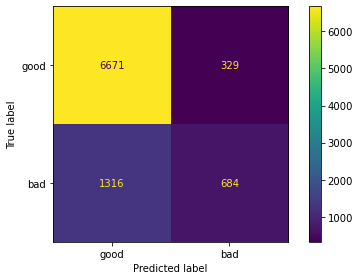

In [51]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
cm=confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['good','bad'])
cmd.plot()


Above confusion metrics tells that out of 2000 bad only 616 bad and 6707 good are predicted correctly. There are  1384 predicted incorrect as good and 293 predicted incorrect as Bad 


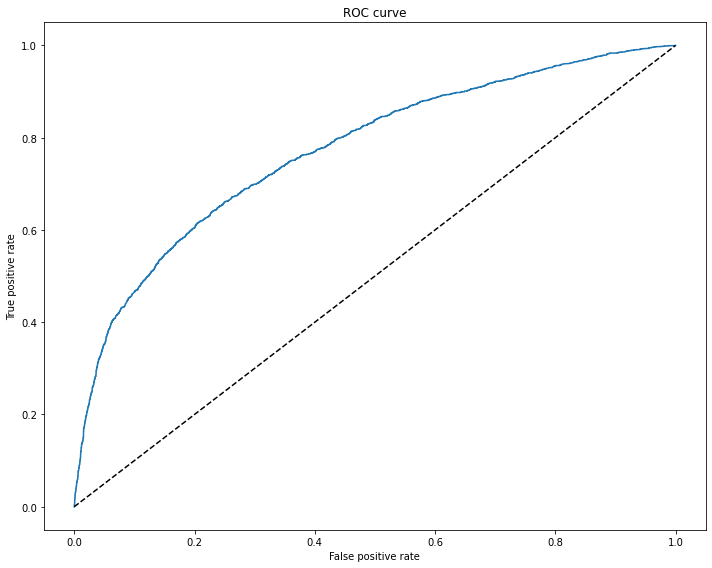

In [52]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [53]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
auroc = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
auroc

0.7721016785714286

In [54]:
# calculate Gini from AUROC
gini = auroc * 2 - 1
gini

0.5442033571428573


From the logistic regression summary there are few parameters by which we can determine the best optimum model. Initially all the independent are considered as input variable. From the summary, few independent variables like ‘ PAY_AMT5_woe’,are not adding up values as P values of those variables are greater than 0.05(significance label), So all those variables will be drop in next phase of iteration. Notably this has been seen that accuracy, Precision and recall values are respectively better than other models. All these metrices are calculated considering 0.5 as threshold value. So to get the optimum value I will check accuracy ,precision value with respect to different probability threshold value 


In [55]:
lst=x_train_woe.columns.tolist()

In [56]:
lst_in=['BILL_AMT3_woe',
 #'BILL_AMT5_woe',
 'AGE_woe',
 #'BILL_AMT6_woe',
 'PAY_2_woe',
 'PAY_AMT4_woe',
 #'BILL_AMT4_woe',
 #'EDUCATION_woe',
 'PAY_3_woe',
 'PAY_0_woe',
 'BILL_AMT1_woe',
 'PAY_AMT3_woe',
 #'PAY_AMT5_woe',
 'PAY_6_woe',
 'PAY_4_woe',
 'PAY_5_woe',
 'PAY_AMT1_woe',
 'LIMIT_BAL_woe',
# 'BILL_AMT2_woe',
 'PAY_AMT6_woe',
 'PAY_AMT2_woe']

In [57]:
logit_model=sm.Logit(y_train_woe,x_train_woe[lst_in])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555386
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.052    
Dependent Variable: target           AIC:              23356.2216
Date:               2023-06-03 19:42 BIC:              23475.5058
No. Observations:   21000            Log-Likelihood:   -11663.   
Df Model:           14               LL-Null:          -11085.   
Df Residuals:       20985            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
BILL_AMT3_woe     -0.6589   0.2790 -2.3618 0.0182 -1.2057 -0.1121
AGE_woe            0.4434   0.1125  3.9400 0.0001  0.2228  0.6640


In [58]:
lr = LogisticRegression()
lr.fit(x_train_woe[lst_in], y_train_woe)

LogisticRegression()

In [64]:
x_test_woe[lst_in].head(1)

,BILL_AMT3_woe,AGE_woe,PAY_2_woe,PAY_AMT4_woe,PAY_3_woe,PAY_0_woe,BILL_AMT1_woe,PAY_AMT3_woe,PAY_6_woe,PAY_4_woe,PAY_5_woe,PAY_AMT1_woe,LIMIT_BAL_woe,PAY_AMT6_woe,PAY_AMT2_woe
10747,-0.140391,-0.160764,-0.405003,-0.16346,-0.279843,-0.653171,-0.157202,-0.188312,-0.183486,-0.222729,-0.189411,-0.485817,-0.338483,0.019319,-0.44522


In [59]:

# make preditions on our test set
y_hat_test = lr.predict(x_test_woe[lst_in])
# get the predicted probabilities
y_hat_test_proba = lr.predict_proba(x_test_woe[lst_in])
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_woe.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = x_test_woe.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
10747,0,0.101223
12573,1,0.401460
29676,0,0.126674
8856,1,0.815268
21098,0,0.322720


In [60]:
#y_test_proba.to_csv(r'C:\mystuff\git hub repo\iNeuron\ML project\Credit Card Default Prediction\dataset\archive\y_test_proba.csv')

In [65]:
y_hat_test = lr.predict(x_test_woe[lst_in].head(1))
# get the predicted probabilities
y_hat_test_proba = lr.predict_proba(x_test_woe[lst_in])
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]



In [66]:
y_hat_test_proba

array([0.10122298, 0.40145998, 0.12667365, ..., 0.11785143, 0.26484926,
       0.19543143])

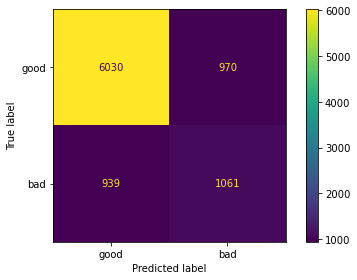

In [61]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.26
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
cm=confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted']
                   )
cm
cmd = ConfusionMatrixDisplay(cm, display_labels=['good','bad'])
cmd.plot()

In [141]:
cm[1,0]

939

In [142]:
recall=cm[1,1]/(cm[1,1]+cm[1,0])
recall

0.5305

In [143]:
precision=cm[1,1]/(cm[1,1]+cm[0,1])
precision

0.5224027572624323

In [144]:
accuracy=(cm[1,1]+cm[0,0])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accuracy

0.7878888888888889

In [145]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
auroc = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'])
auroc

0.6959642857142857

In [146]:
# calculate Gini from AUROC
gini = auroc * 2 - 1
gini

0.3919285714285714

In [149]:
rec=[]
prec=[]
accu=[]
ruc=[]
gi=[]
threshold=[0.10,0.15,0.20,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.40,0.45,0.50]
# assign a threshold value to differentiate (base = 50% prob)

for tr in threshold:
    
    y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
    cm=confusion_matrix(y_test_proba['y_test_class_actual'],y_test_proba['y_test_class_predicted'])

    recall=cm[1,1]/(cm[1,1]+cm[1,0])
    precision=cm[1,1]/(cm[1,1]+cm[0,1])
    accuracy=(cm[1,1]+cm[0,0])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    auroc = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'])
    gini = auroc * 2 - 1
    rec.append(recall)
    prec.append(precision)
    accu.append(accuracy)
    ruc.append(auroc)
    gi.append(gini)
    
metrix=pd.DataFrame(list(zip(threshold,accu,prec,rec,ruc,gi)),
columns=['threshold','accuracy', 'precision','recall','auroc','gini'])    

In [148]:
metrix

,threshold,accuracy,precision,recall,auroc,gini
0,0.10,0.412000,0.266193,0.9370,0.599500,0.199000
1,0.15,0.658444,0.368768,0.7545,0.692750,0.385500
2,0.20,0.755667,0.462095,0.6065,0.702393,0.404786
3,0.25,0.784889,0.515267,0.5400,0.697429,0.394857
4,0.26,0.787889,0.522403,0.5305,0.695964,0.391929
5,0.27,0.790333,0.528637,0.5215,0.694321,0.388643
6,0.28,0.792556,0.534690,0.5125,0.692536,0.385071
7,0.29,0.794222,0.539446,0.5060,0.691286,0.382571
8,0.30,0.796222,0.545655,0.4960,0.689000,0.378000
9,0.31,0.798000,0.551646,0.4860,0.686571,0.373143


After dropping the variables, the achieved result has been improved. Accuracy , precision, recall auc and gini index has been checked with respect to different threshold. I have applied probability 0.10 to 0.50 and 0.26 came out the optimal for the modelling with accuracy 0.787889, precision 0.522403, recall 0.5305, ruc 0.695964 and gini 0.391929. This is clearly seen that recall value has improved from 0.35 to 0.53 and AUC from 0.64 to 0.69



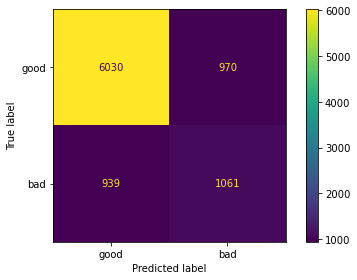

In [156]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.26
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
cm=confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted']
                   )
cm
cmd = ConfusionMatrixDisplay(cm, display_labels=['good','bad'])
cmd.plot()

In [124]:
ada=AdaBoostClassifier(random_state=90)
ada.fit(x_train, y_train_woe)
# make preditions on our test set
y_hat_test = ada.predict(x_test)
# get the predicted probabilities
y_hat_test_proba = ada.predict_proba(x_test)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test_woe.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = x_test_woe.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
10747,0,0.488286
12573,1,0.500535
29676,0,0.488573
8856,1,0.501948
21098,0,0.497040


In [125]:
#y_test_proba.to_csv(r'C:\mystuff\git hub repo\iNeuron\ML project\Credit Card Default Prediction\dataset\archive\y_test_proba_adab.csv')

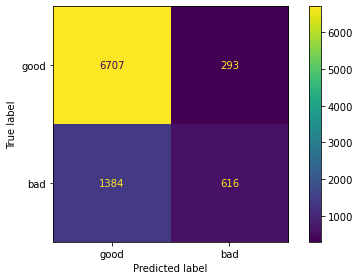

In [126]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.50
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
cm=confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted']
                   )
cm
cmd = ConfusionMatrixDisplay(cm, display_labels=['good','bad'])
cmd.plot()

In [128]:
rec=[]
prec=[]
accu=[]
ruc=[]
gi=[]
threshold=[0.481,0.482,0.50]
# assign a threshold value to differentiate (base = 50% prob)

for tr in threshold:
    
    y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
    cm=confusion_matrix(y_test_proba['y_test_class_actual'],y_test_proba['y_test_class_predicted'])

    recall=cm[1,1]/(cm[1,1]+cm[1,0])
    precision=cm[1,1]/(cm[1,1]+cm[0,1])
    accuracy=(cm[1,1]+cm[0,0])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    auroc = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'])
    gini = auroc * 2 - 1
    rec.append(recall)
    prec.append(precision)
    accu.append(accuracy)
    ruc.append(auroc)
    gi.append(gini)
    
metrix=pd.DataFrame(list(zip(threshold,accu,prec,rec,ruc,gi)),
columns=['threshold','accuracy', 'precision','recall','auroc','gini'])
    

In [129]:
metrix

,threshold,accuracy,precision,recall,auroc,gini
0,0.481,0.228556,0.223143,0.9960,0.502643,0.005286
1,0.482,0.233778,0.224014,0.9935,0.505107,0.010214
2,0.500,0.813667,0.677668,0.3080,0.633071,0.266143


Same has been repeated with Ada boost algorithm. But result is not satisfactory as logistic regression.  Number of Bad class prediction is very less so Precision and Recall score also came out not satisfactory and only limited probability band works here.

In [160]:
import pickle
#file='linear_reg.pkl'
filepath = r'C:\mystuff\git hub repo\iNeuron\ML project\Credit Card Default Prediction\_model_lr_cc_default.pkl'
pickle.dump(lr, open(filepath, 'wb'))

In [163]:

saved_model_lr=pickle.load(open(r'C:\mystuff\git hub repo\iNeuron\ML project\Credit Card Default Prediction\_model_lr_cc_default.pkl','rb'))

In [ ]:
saved_model_lr.predict